# Assignment 5: Representational similarity analysis (10 pts)

In [1]:
import numpy as np
from sklearn.manifold import MDS
from scipy.stats import spearmanr

import matplotlib.pyplot as plt

In [2]:
# Download the dataset used in this assignment
!gdown 1rYUDnQwYmnRnf1Tbn_OeNFVydtJdUpZ-

Downloading...
From: https://drive.google.com/uc?id=1rYUDnQwYmnRnf1Tbn_OeNFVydtJdUpZ-
To: /content/data_RSA.npy
100% 140k/140k [00:00<00:00, 93.7MB/s]


### Dataset description
In this assignment, you will use a dataset dictionary “data_RSA.npy”. This dictionary contains 4 arrays, named ['model1', 'model2', 'model3', 'fMRI']. In each array, each row corresponds to an experimental trial (total of 60 trials), and each column corresponds to a feature. In the ‘fMRI’ array, each feature represents a voxel. In all the other arrays, each feature represents some features extracted from the trial by a computational model. In this experiment, there were 60 trials divided into X conditions, and each condition was repeated Y times.

In [3]:
# Read in data
data_RSA = np.load('data_RSA.npy',allow_pickle=True).item() # A data dictonary containing all the data needed
print(data_RSA.keys())
print(data_RSA['fMRI'].shape) # number of trials and voxels

dict_keys(['model1', 'model2', 'model3', 'fMRI'])
(60, 100)


#### ✏️ Do it yourself (2 pts):
Create RDM here for the fMRI data \
_Hint:Use the distance measure $1 - {\rho}$ (pearson correlation)_

In [7]:

from scipy.spatial.distance import pdist, squareform

# Insert your code here
rdm_fmri = squareform(pdist(data_RSA['fMRI'], metric='correlation'))



### Visualize the RDM

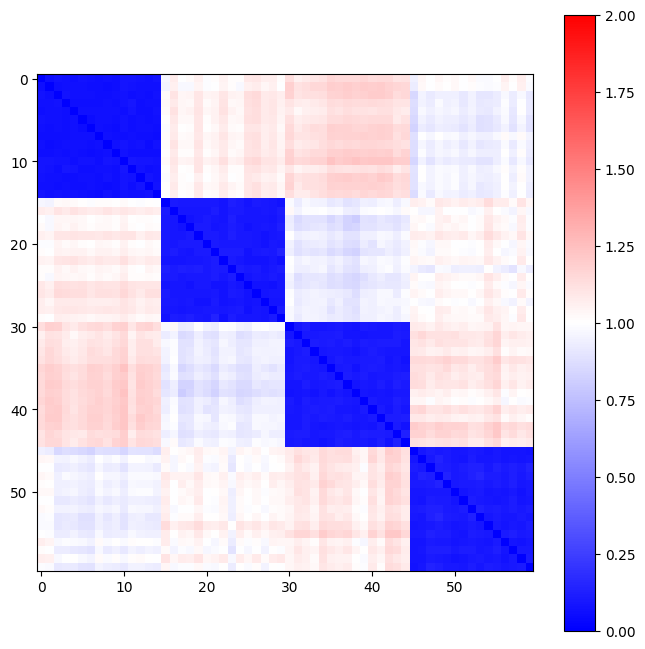

In [6]:
# Assume the RDM is an 8X8 numpy array
plt.figure(figsize=(8, 8))
plt.imshow(rdm_fmri,
           interpolation='none',
           cmap='bwr',
           vmin=0,
           vmax=2,
          )
plt.colorbar()

#### ✏️ Do it yourself (1 pts):
By visualizing the RDM of the above fMRI data, guess what X is and provide your reasoning for that.

Write your answer here:
> **Answer:**
> X = 4 conditions. The RDM is 60 trials divided into X conditions. There are 4 distinct low-dissimilarity blocks along the diagonal. Since there are 60 trials and each block contains 60/4 trials, there are likely 4 conditions, each condition being repeated 15 times. The block structure is visible because trials within the same condition produce similar fMRI patterns (low dissimilarity, giving a low 1-p distance), whereas trials of different conditions produce high dissimilarity, giving a high 1-p distance.
>   

#### ✏️ Do it yourself (4 pts):
Compute and visualize the RDMs for each of the three computational models. Then vectorize the lower triangular (do not include the diagonal) of all the RDMs (including the fMRI one). Report the correlation of the fMRI RDM vector with all three model RDM vectors.
1. Use the distance measure $1 - {\rho}$ (pearson correlation) for the RDM calculation (2 pts).<br>
2. Vectorize the lower diagonal of the RDM (do not include the diagonal) (1 pt) <br>
3. Use Spearman correlation to calculate the correlation between RDMs (1 pt). \
_Hint:Use `spearmanr` from scipy to compute Spearman correlation_

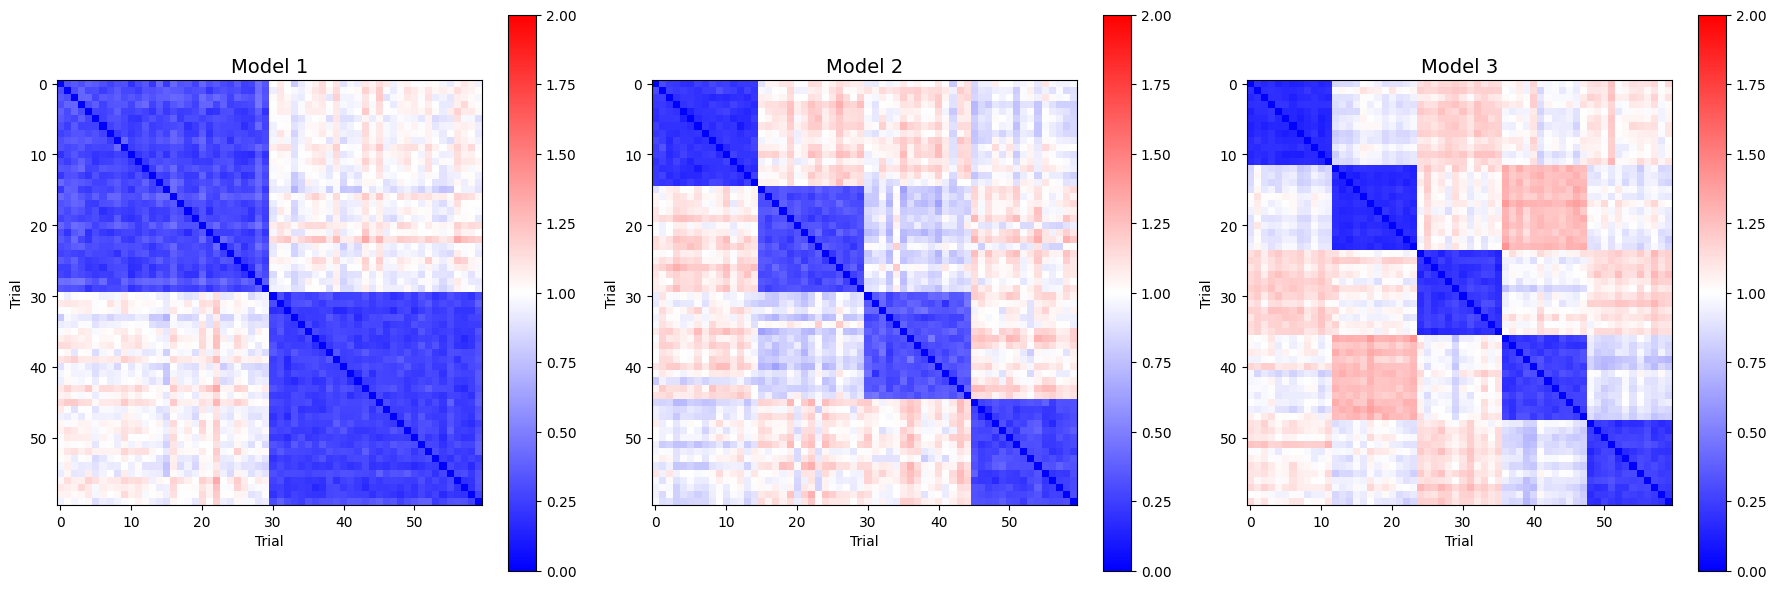

Vector length (n*(n-1)/2 = 60*59/2): 1770
fMRI vs Model 1: Spearman r = 0.1733,  p = 2.1275e-13
fMRI vs Model 2: Spearman r = 0.8234,  p = 0.0000e+00
fMRI vs Model 3: Spearman r = 0.3535,  p = 2.9429e-53


In [8]:
# Insert your code here

from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr
import numpy as np
import matplotlib.pyplot as plt

# 1. Compute RDMs for all four arrays
rdm_fmri   = squareform(pdist(data_RSA['fMRI'],   metric='correlation'))
rdm_model1 = squareform(pdist(data_RSA['model1'], metric='correlation'))
rdm_model2 = squareform(pdist(data_RSA['model2'], metric='correlation'))
rdm_model3 = squareform(pdist(data_RSA['model3'], metric='correlation'))

# 2. Visualize the three model RDMs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, rdm, title in zip(axes,
                           [rdm_model1, rdm_model2, rdm_model3],
                           ['Model 1', 'Model 2', 'Model 3']):
    im = ax.imshow(rdm, interpolation='none', cmap='bwr', vmin=0, vmax=2)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Trial')
    ax.set_ylabel('Trial')
    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

# 3. Vectorize lower triangle (diagonal excluded)
# np.tril_indices with k=-1 extracts below-diagonal entries only
n = rdm_fmri.shape[0]
lower_idx = np.tril_indices(n, k=-1)   # k=-1 → exclude diagonal

vec_fmri   = rdm_fmri[lower_idx]
vec_model1 = rdm_model1[lower_idx]
vec_model2 = rdm_model2[lower_idx]
vec_model3 = rdm_model3[lower_idx]

print(f"Vector length (n*(n-1)/2 = {n}*{n-1}/2): {len(vec_fmri)}")

# 4. Spearman correlation between fMRI and each model RDM
for name, vec in [('Model 1', vec_model1),
                  ('Model 2', vec_model2),
                  ('Model 3', vec_model3)]:
    r, p = spearmanr(vec_fmri, vec)
    print(f"fMRI vs {name}: Spearman r = {r:.4f},  p = {p:.4e}")

#### ✏️ Do it yourself (2 pts):
1. Perform MDS to the fMRI RDM, generate both a 2-D and 3-D image of the RDM (1 pt).
2. In the 2-D plot, group the trials (by color) into different conditions based on how you think they should be grouped (1 pt). \
_Hint: Use the MDS function in scikit-learn_

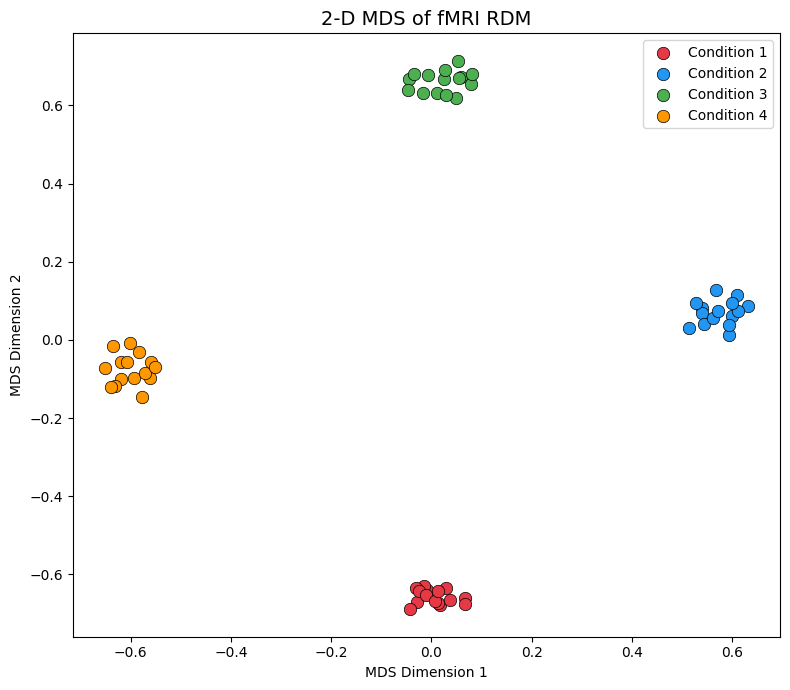

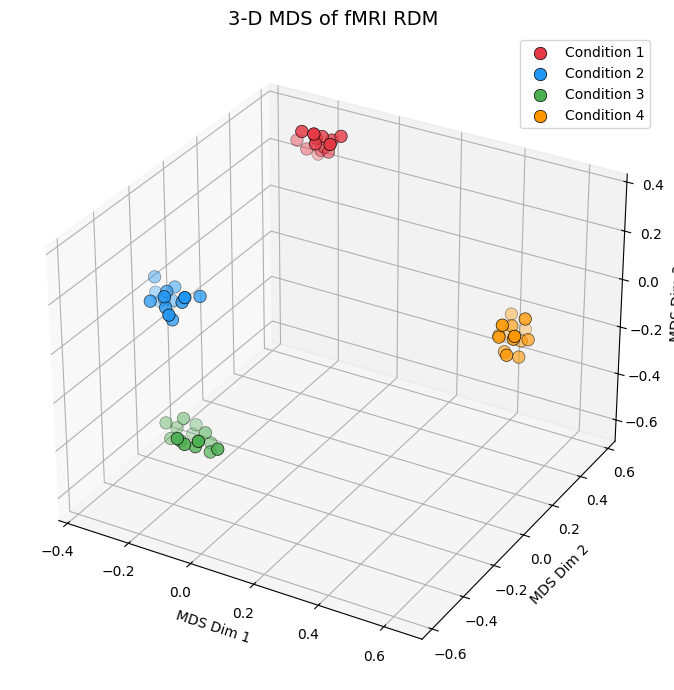

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# 1. Fit MDS
mds_2d = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_3d = MDS(n_components=3, dissimilarity='precomputed', random_state=42)

mds_2d_data = mds_2d.fit_transform(rdm_fmri)   # shape (60, 2)
mds_3d_data = mds_3d.fit_transform(rdm_fmri)   # shape (60, 3)

# 2. Define condition labels (4 conditions × 15 trials each)
n_conditions = 4
trials_per_condition = 60 // n_conditions                        # = 15
labels = np.repeat(np.arange(n_conditions), trials_per_condition)  # [0,0,...,1,1,...,3]
colors  = ['#E63946', '#2196F3', '#4CAF50', '#FF9800']
cnames  = ['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4']

# 3. 2-D MDS plot (colored by condition)
fig, ax = plt.subplots(figsize=(8, 7))
for c in range(n_conditions):
    mask = labels == c
    ax.scatter(mds_2d_data[mask, 0], mds_2d_data[mask, 1],
               color=colors[c], label=cnames[c], s=80, edgecolors='k', linewidths=0.5)

ax.set_title('2-D MDS of fMRI RDM', fontsize=14)
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.legend()
plt.tight_layout()
plt.show()

# 4. 3-D MDS plot
fig = plt.figure(figsize=(9, 7))
ax3 = fig.add_subplot(111, projection='3d')
for c in range(n_conditions):
    mask = labels == c
    ax3.scatter(mds_3d_data[mask, 0],
                mds_3d_data[mask, 1],
                mds_3d_data[mask, 2],
                color=colors[c], label=cnames[c], s=80, edgecolors='k', linewidths=0.5)

ax3.set_title('3-D MDS of fMRI RDM', fontsize=14)
ax3.set_xlabel('MDS Dim 1')
ax3.set_ylabel('MDS Dim 2')
ax3.set_zlabel('MDS Dim 3')
ax3.legend()
plt.tight_layout()
plt.show()

#### ✏️ Do it yourself (1 pt):
Please justify your decision to group trials into those separate conditions.

Write your answer here:
> **Answer:**
> The trials should be grouped into 4 separate conditions because trials within each block have very low dissimilarity and trials between each block have much higher dissimilarity. Also, the 2-D and 3-D MDS plots should reveal 4 spatially separated clusters in the embedded representational space. MDS preserves the pairwise distances from the RDM, so trials that are close together in the plot share similar neural representations. The fact that the 4 groups of 15 consecutive trials occupy distinct regions of the MDS space confirms they reflect 4 genuinely different neural states.
>   